# 如何用SunPy取得太陽觀測資料？

此notebook為專欄文章"[「天聞的資料科學」如何用SunPy取得太陽觀測資料？](https://matters.news/@astrobackhacker/375244-%E5%A4%A9%E8%81%9E%E7%9A%84%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E5%A6%82%E4%BD%95%E7%94%A8sun-py%E5%8F%96%E5%BE%97%E5%A4%AA%E9%99%BD%E8%A7%80%E6%B8%AC%E8%B3%87%E6%96%99-bafybeib4tbbmf5t3pudqsyp4mm2dhck3run327uqdd3r7fp7hrnzy5xib4)"的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/data-science-with-astronomy-news/blob/main/LICENSE)釋出。此外，本專欄也是[「天文的資料科學」教育產品開發計畫](https://matters.news/@astrobackhacker/364036-%E5%A4%A9%E6%96%87%E7%9A%84%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E4%BE%86%E7%94%A8python%E6%8B%89%E8%BF%91%E6%88%91%E5%80%91%E8%88%87%E6%98%9F%E7%A9%BA%E7%9A%84%E8%B7%9D%E9%9B%A2-%E6%95%99%E8%82%B2%E7%94%A2%E5%93%81%E9%96%8B%E7%99%BC%E8%AA%BF%E6%9F%A5%E8%A1%A8%E5%96%AE-bafybeiahet2kggahd2wwst6flujiwkdwvg6wyiz23c4dtlgyvn2odhfdfi)的一部分，如果你想要體驗更多從資料產出天文新知識的旅程，歡迎填寫[這份調查表單](https://docs.google.com/forms/d/e/1FAIpQLSdSjnrvdsqAtALGfIMxXhQMZ9PRO-e_2ML6kzg6tjqyHNl1eA/viewform)，讓我能根據你的需求及建議，制定適合你的教學內容及呈現方式。

## 什麼是SunPy？

[SunPy](https://sunpy.org/)是一個專門用於太陽相關研究的Python套件，方便使用者取得、處理、分析和視覺化來自各種太陽觀測衛星的資料。

## 安裝SunPy及其擴充套件

In [ ]:
pip install "sunpy[all]"

## SunPy提供哪些功能可以用來取得太陽觀測資料？

[sunpy.data.sample](https://docs.sunpy.org/en/stable/code_ref/data.html#module-sunpy.data.sample)可取得範例檔案，以便快速展示及測試SunPy的功能。但如果想要搜尋並下載特定衛星儀器在某段時間的觀測資料，就需要使用[sunpy.net的Fido](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html)。若取得的資料是影像類型，要以[sunpy.map](https://docs.sunpy.org/en/stable/guide/data_types/maps.html)來讀取、處理及畫圖，若屬於時間序列類型，則要用[sunpy.timeseries](https://docs.sunpy.org/en/stable/guide/data_types/timeseries.html)。

## 範例1：用sunpy.data.sample取得GOES衛星的時間序列觀測資料
[Geostationary Operational Environmental Satellite(GOES)](https://en.wikipedia.org/wiki/Geostationary_Operational_Environmental_Satellite)是由美國國家海洋暨大氣總署營運的氣象衛星，用於監測地球氣象並預測颱風、暴雨等災害事件，同時也搭載能觀測太陽的儀器。

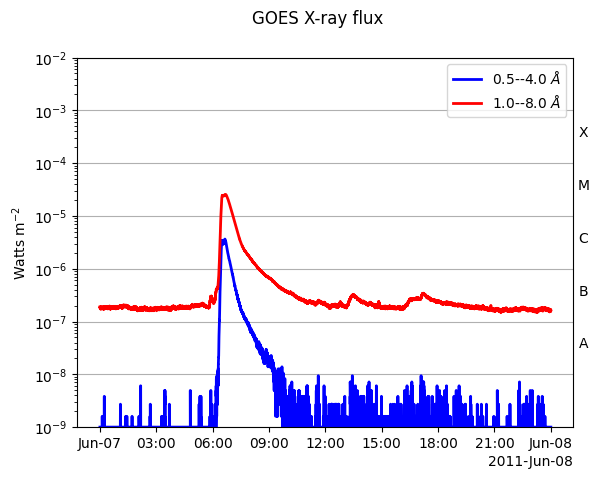

In [2]:
import sunpy.timeseries as ts
import sunpy.data.sample

# 讀取範例檔案GOES_XRS_TIMESERIES，這是GOES衛星上的儀器X-Ray Sensor(XRS)的時間序列觀測資料
ts = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES)

# 繪製時間序列圖，顯示太陽在不同波長範圍(0.5-4埃和1-8埃)的X射線輻射強度隨時間的變化
ts.peek()

## 範例2：用sunpy.data.sample取得STEREO-A衛星的影像觀測資料
[Solar Terrestrial Relations Observatory(STEREO)](https://en.wikipedia.org/wiki/STEREO)是由美國國家航空暨太空總署主持的計畫，藉由兩個衛星，STEREO-A和STEREO-B，在不同的角度對太陽進行觀測，建立太陽的3D影像。

EUVI
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


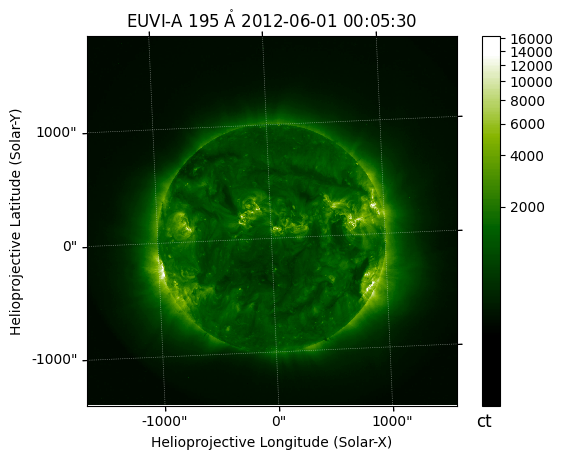

In [3]:
import sunpy.map
import sunpy.data.sample

# 讀取範例檔案STEREO_A_195_JUN2012，這是STEREO-A衛星上的儀器Extreme Ultraviolet Imager(EUVI)所拍攝的影像
map = sunpy.map.Map(sunpy.data.sample.STEREO_A_195_JUN2012)

# 印出這影像資料是藉由哪個探測器拍攝
print(map.meta['detector'])

# 呈現太陽在波長195埃的極紫外線影像
map.peek()

## 範例3：用sunpy.net的Fido取得SOHO衛星的影像觀測資料

[Solar and Heliospheric Observatory(SOHO)](https://en.wikipedia.org/wiki/Solar_and_Heliospheric_Observatory)是由歐洲太空總署和美國國家航空暨太空總署合作發射的衛星，目的是研究太陽的內部結構、外層大氣和太陽風。

Files Downloaded: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.13file/s]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


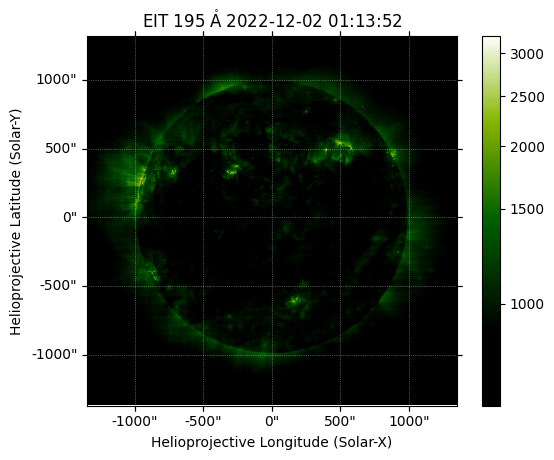

In [4]:
from sunpy.net import Fido, attrs as a
from astropy import units as u
import sunpy.map

# 設定要搜尋的時間範圍
timerange = a.Time('2022/12/1', '2022/12/5')

# 設定要搜尋的儀器為SOHO衛星上的Extreme ultraviolet Imaging Telescope(EIT)
instrument = a.Instrument('EIT')

# 設定要搜尋的波長為195埃
wavelength = a.Wavelength(195*u.angstrom)

# 搜尋並下載符合時間、儀器和波長篩選條件的資料
results = Fido.search(timerange, instrument, wavelength)
files = Fido.fetch(results)

# 讀取第3個檔案中的資料，呈現太陽在波長195埃的極紫外線影像
maps = sunpy.map.Map(files[2])
maps.peek()

## 範例4：用sunpy.net的Fido取得SDO衛星的影像觀測資料


[Solar Dynamics Observatory(SDO)](https://en.wikipedia.org/wiki/Solar_Dynamics_Observatory)是美國國家航空暨太空總署在2010年發射的衛星，主要任務是觀測太陽的大氣與磁場活動，以了解太陽如何影響地球及其周圍的太空環境。

Files Downloaded: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.16s/file]


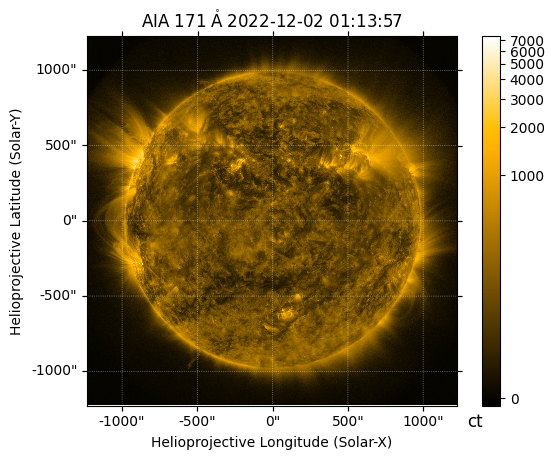

In [6]:
from sunpy.net import Fido, attrs as a
from astropy import units as u
import sunpy.map

# 搜尋並下載符合時間、儀器和波長篩選條件的資料，aia是指SDO衛星上的儀器Atmospheric Imaging Assembly(AIA)
results = Fido.search(a.Time('2022/12/02 01:13', '2022/12/02 01:14'), a.Instrument.aia, a.Wavelength(171*u.angstrom))
files = Fido.fetch(results)

# 讀取第5個檔案中的資料，呈現太陽在波長171埃的極紫外線影像
maps = sunpy.map.Map(files[4])
maps.peek()